In [23]:
import clusim

import numpy as np

import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('white')

In [3]:
print(clusim.available_similarity_measures)
row_format2 ="{:>25}" * (2)
row_format3 ="{:>25}" * (3)

['jaccard_index', 'rand_index', 'fowlkes_mallows_index', 'rogers_tanimoto_index', 'southwood_index', 'czekanowski_index', 'dice_index', 'sorensen_index', 'pearson_correlation', 'classification_error', 'fmeasure', 'nmi', 'vi', 'geometric_accuracy', 'overlap_quality', 'nmi_lfk', 'omega_index']


In [6]:
c1 = clusim.make_random_clustering(n_elements = 10, n_clusters = 2)
c2 = clusim.make_random_clustering(n_elements = 10, n_clusters = 5)

clusim.print_clustering(c1)
clusim.print_clustering(c2)

for simfunc in clusim.available_similarity_measures:
    print(row_format2.format(simfunc, eval('clusim.' + simfunc+'(c1, c2)')))

0|135|247|6|8|9
07|1359|26|4|8
            jaccard_index       0.2727272727272727
               rand_index       0.8222222222222222
    fowlkes_mallows_index      0.43301270189221935
    rogers_tanimoto_index       0.6981132075471698
          southwood_index                    0.375
        czekanowski_index      0.42857142857142855
               dice_index      0.42857142857142855
           sorensen_index      0.42857142857142855
      pearson_correlation     0.001256063756063756
     classification_error      0.29999999999999993
                 fmeasure      0.42857142857142855
                      nmi       0.7329106608538911
                       vi       1.1999999999999997
       geometric_accuracy       0.7483314773547882
          overlap_quality                     -0.0
                  nmi_lfk        0.684305708511048
              omega_index       0.3258426966292132


In [15]:
# Adjusted Rand Index
for rdm in clusim.available_random_models:
    print(row_format2.format(rdm, str(clusim.adjrand_index(c1, c2, random_model = rdm))))

                     perm        0.325842696629214
                    perm1        0.325842696629214
                      num        0.263792600675403
                     num1         0.29587044534413
                      all        0.403801493716108
                     all1        0.397948039762164


In [16]:
# Adjusted Mutual Information
for rdm in clusim.available_random_models:
    print(row_format2.format(rdm, str(clusim.adj_mi(c1, c2, random_model = rdm))))

                     perm         0.27045616686859
                    perm1         0.27045616686859
                      num        0.208230778539507
                     num1        0.231901400411349
                      all        0.508046831414504
                     all1        0.482225836801386


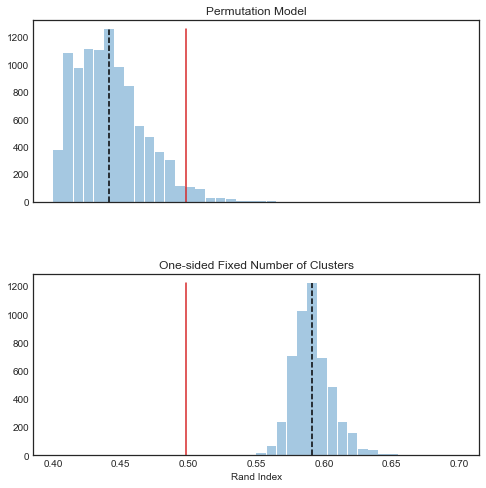

In [25]:
# An example sampling from a random distrubtion of clusterings

ground_truth = clusim.Clustering()
ground_truth.from_membership_list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

detected_clustering = clusim.Clustering()
detected_clustering.from_membership_list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 3, 3, 2, 1])

Nsamples = [100, int(100*99/2)]
model_list = ['perm', 'num1']
true_value = clusim.rand_index(detected_clustering, ground_truth)

fig, ax = plt.subplots(2,1, sharex = True, figsize = (8,8), gridspec_kw={'hspace':0.4})
bins = np.linspace(0.4, 0.7, 41)

titles = ['Permutation Model', 'One-sided Fixed Number of Clusters']
for iax in range(2):
    pairwise_comparisons = clusim.sample_expected_sim(detected_clustering, ground_truth, measure = 'rand_index', 
                                                       random_model = model_list[iax], 
                                                      nsamples = Nsamples[iax], keep_samples = True)

    rand_dist, bins = np.histogram(pairwise_comparisons, bins = bins)

    ax[iax].bar(0.5*(bins[:-1] + bins[1:]), rand_dist, width = 0.95*np.abs(bins[:-1] - bins[1:]), alpha = 0.4)
    
    exp_value = clusim.expected_rand_index(ground_truth.n_elements, random_model = model_list[iax], 
                                         n_clusters1 = detected_clustering.n_clusters, 
                                         n_clusters2 = ground_truth.n_clusters, 
                                         clus_size_seq1 = detected_clustering.clus_size_seq, 
                                         clus_size_seq2 = ground_truth.clus_size_seq)
    
    ax[iax].plot([exp_value,exp_value], [0, rand_dist.max()], c = 'k', ls = '--')

    ax[iax].plot([true_value,true_value], [0, rand_dist.max()], c = sns.color_palette()[3])
    ax[iax].set_title(titles[iax])
    
ax[1].set_xlabel('Rand Index')
plt.show()

In [19]:
# Element-centeric Clustering Similarity

# first consider the case of two partitions (no overlap or hierarchy)
clustering1 = clusim.Clustering(elm2clus_dict = {0:[0], 1:[0], 2:[1], 3:[1], 4:[2], 5:[2]})
clustering2 = clusim.Clustering(elm2clus_dict = {0:[0], 1:[1], 2:[1], 3:[1], 4:[1], 5:[2]})

clusim.print_clustering(clustering1)
clusim.print_clustering(clustering2)
print("Element-centric Similarity:", clusim.element_sim(clustering1, clustering2, alpha = 0.9) )
print("Element-centric Similarity for each element:")
elementScores, relabeled_elements = clusim.element_sim_elscore(clustering1, clustering2, alpha = 0.9) 
print(elementScores)

print()
# now lets conisder an example with overlap
clustering3 = clusim.Clustering(elm2clus_dict = {0:[0], 1:[0], 2:[0,1], 3:[1], 4:[2], 5:[2]})
clusim.print_clustering(clustering3)
print("Element-centric Similarity:", clusim.element_sim(clustering1, clustering3, alpha = 0.9))
print("Element-centric Similarity for each element:")
elementScores, relabeled_elements = clusim.element_sim_elscore(clustering1, clustering3, alpha = 0.9)
print(elementScores)

01|23|45
0|1234|5
Element-centric Similarity: 0.4166666666666667
Element-centric Similarity for each element:
[0.5  0.25 0.5  0.5  0.25 0.5 ]

012|23|45
Element-centric Similarity: 0.7017543859649121
Element-centric Similarity for each element:
[0.45614035 0.45614035 0.61403509 0.68421053 1.         1.        ]
